# Install tensorflow

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 300.8/300.8 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 413.2/413.2 kB 6.5 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 4.3 MB/s eta 0:00:00
     ------------------------------------ 130.2/130.2 kB 697.4 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 183.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# a. Import the Necessary Packages

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# b. Load the Training and Testing Data

In [5]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [6]:
X_train = train_data.drop('label', axis=1) / 255.0
y_train = to_categorical(train_data['label'])
X_test = test_data.drop('label', axis=1) / 255.0
y_test = to_categorical(test_data['label'])

# c. Define the Network Architecture Using Keras

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# d. Train the Model Using SGD with 11 Epochs

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=11, batch_size=128)

Epoch 1/11


469/469 [==============================] - 2s 4ms/step - loss: 1.1117 - accuracy: 0.7550 - val_loss: 0.6044 - val_accuracy: 0.8658
Epoch 2/11
469/469 [==============================] - 2s 4ms/step - loss: 0.5252 - accuracy: 0.8723 - val_loss: 0.4337 - val_accuracy: 0.8902
Epoch 3/11
469/469 [==============================] - 2s 4ms/step - loss: 0.4204 - accuracy: 0.8900 - val_loss: 0.3725 - val_accuracy: 0.9015
Epoch 4/11
469/469 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.8998 - val_loss: 0.3394 - val_accuracy: 0.9090
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 0.3438 - accuracy: 0.9062 - val_loss: 0.3168 - val_accuracy: 0.9146
Epoch 6/11
469/469 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.9111 - val_loss: 0.3000 - val_accuracy: 0.9183
Epoch 7/11
469/469 [==============================] - 2s 4ms/step - loss: 0.3069 - accuracy: 0.9145 - val_loss: 0.2875 - val_accuracy: 0.9221
Epoc

# e. Evaluate the Network

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2514 - accuracy: 0.9302


# f. Plot the Training Loss and Accuracy

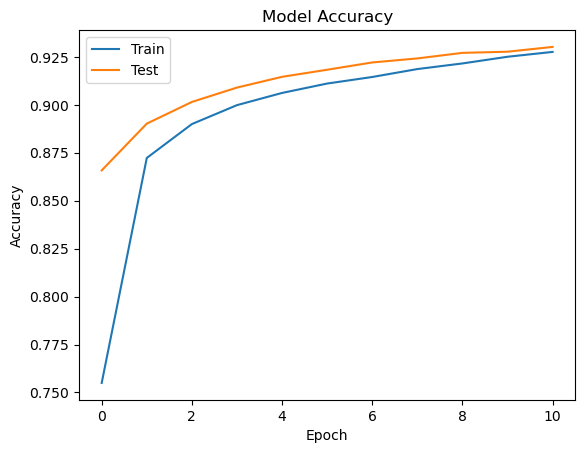

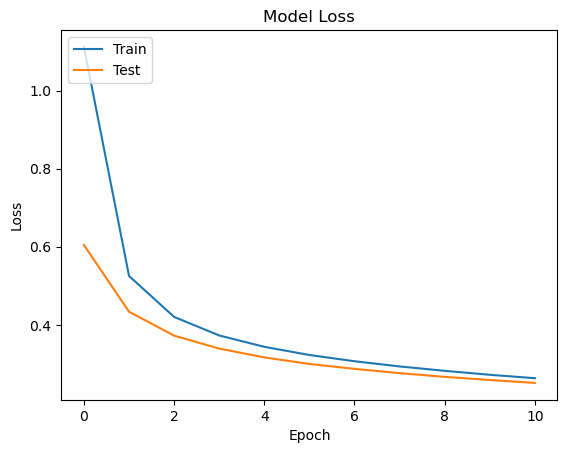

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()